<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

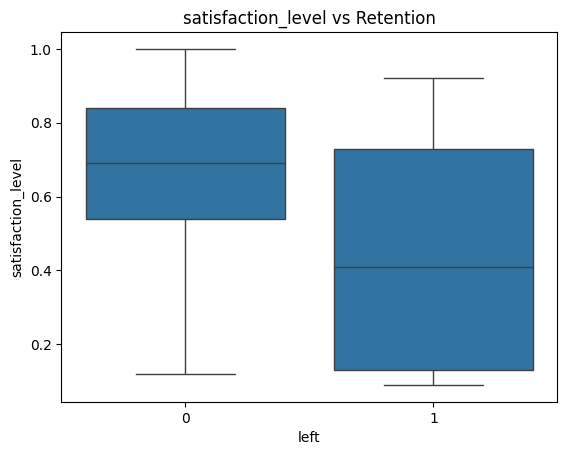

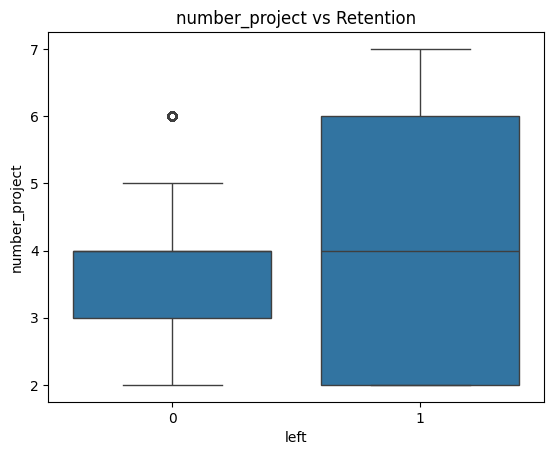

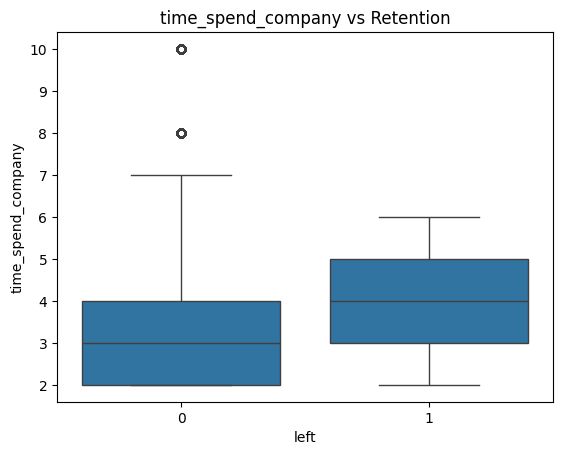

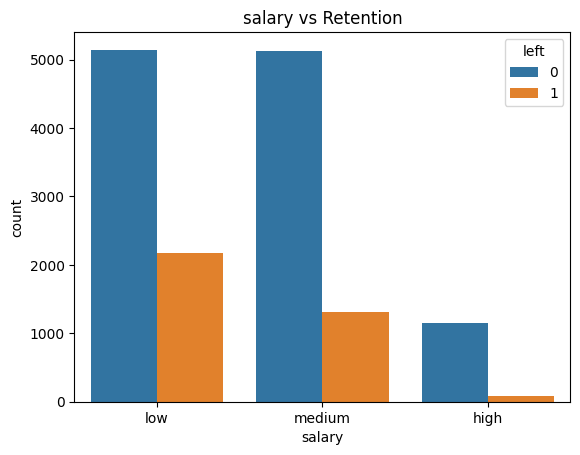

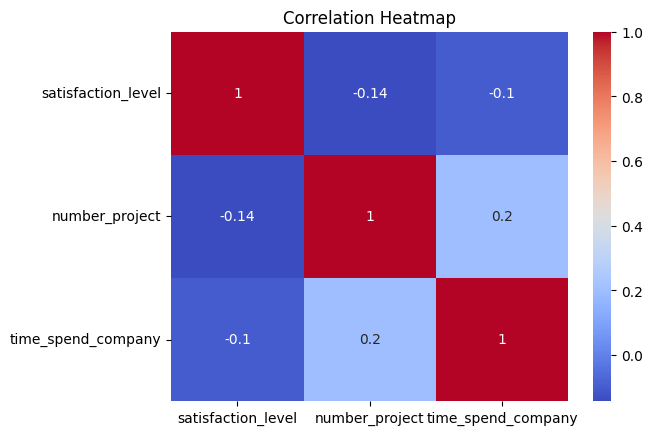

Model Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.80      0.91      0.86      2294
           1       0.50      0.28      0.36       706

    accuracy                           0.77      3000
   macro avg       0.65      0.60      0.61      3000
weighted avg       0.73      0.77      0.74      3000



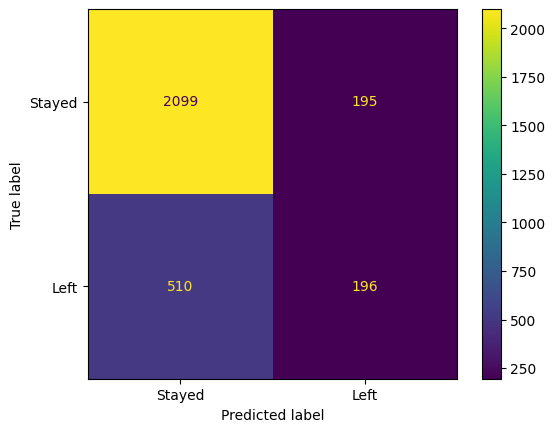

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# Basic Information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Compare numeric features with retention
numeric_cols = df.select_dtypes(include=['number']).columns
print(df.groupby('left')[numeric_cols].mean())

# Boxplots for numeric features
numeric_features = ['satisfaction_level', 'number_project', 'time_spend_company']
for feature in numeric_features:
    sns.boxplot(x='left', y=feature, data=df)
    plt.title(f'{feature} vs Retention')
    plt.show()

# Analyze categorical features
for feature in ['salary']:
    sns.countplot(x=feature, hue='left', data=df)
    plt.title(f'{feature} vs Retention')
    plt.show()

# Correlation Heatmap for Numeric Features
corr = df[['satisfaction_level', 'number_project', 'time_spend_company']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature selection based on EDA
X = df[['satisfaction_level', 'number_project', 'time_spend_company', 'salary']]
X = pd.get_dummies(X, drop_first=True)
y = df['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Left"])
cm_display.plot()
plt.show()


Dataset shape: (101, 18)

First few rows:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0         

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


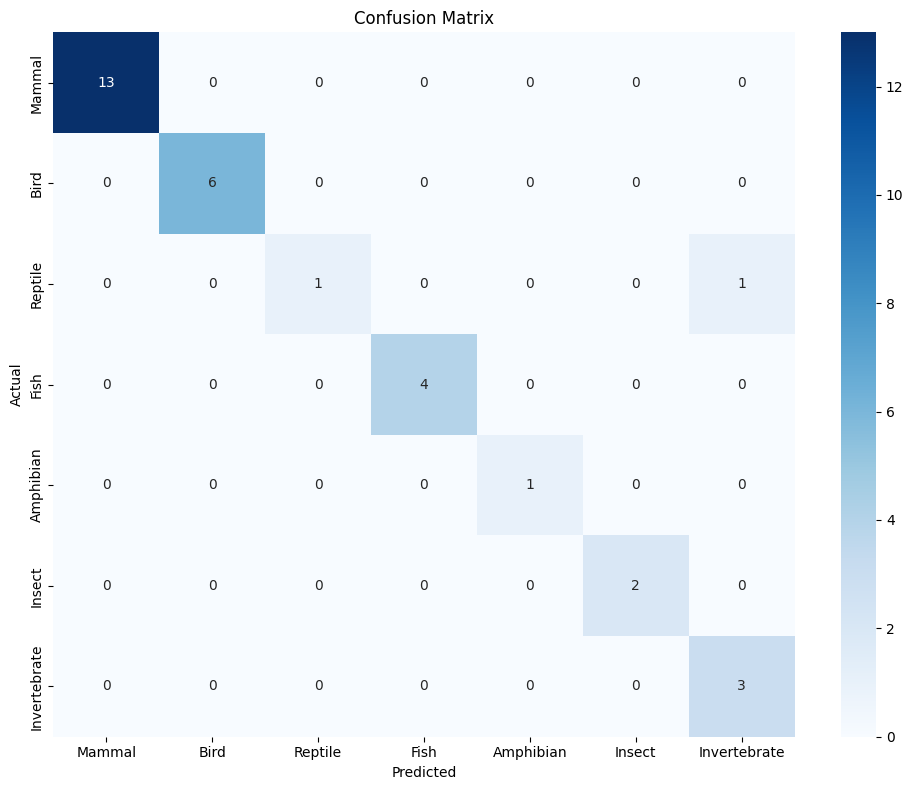


Feature Importance:
     Feature  Importance
8   backbone    0.427496
9   breathes    0.372695
7    toothed    0.346239
5    aquatic    0.344645
1   feathers    0.343725
2       eggs    0.327081
12      legs    0.325793
13      tail    0.313253
3       milk    0.277296
4   airborne    0.268229
11      fins    0.247359
0       hair    0.241356
15   catsize    0.184779
6   predator    0.153535
10  venomous    0.144931
14  domestic    0.075169


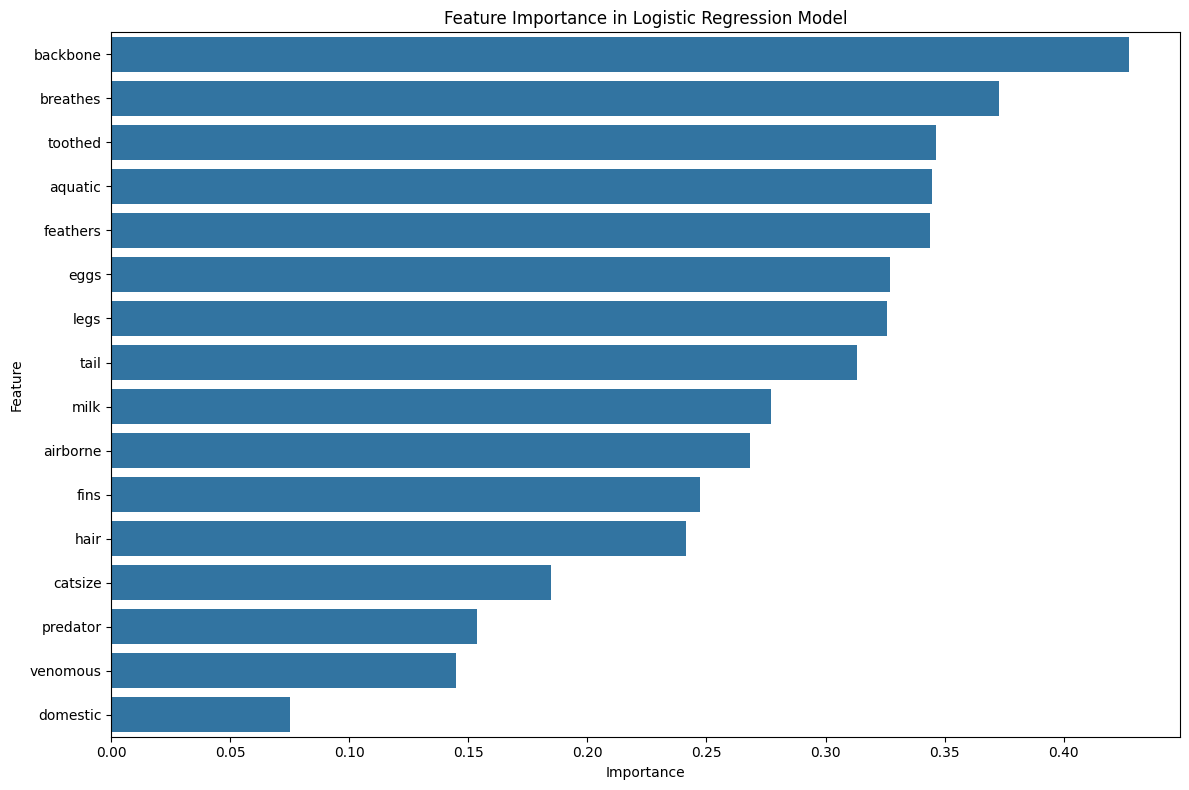

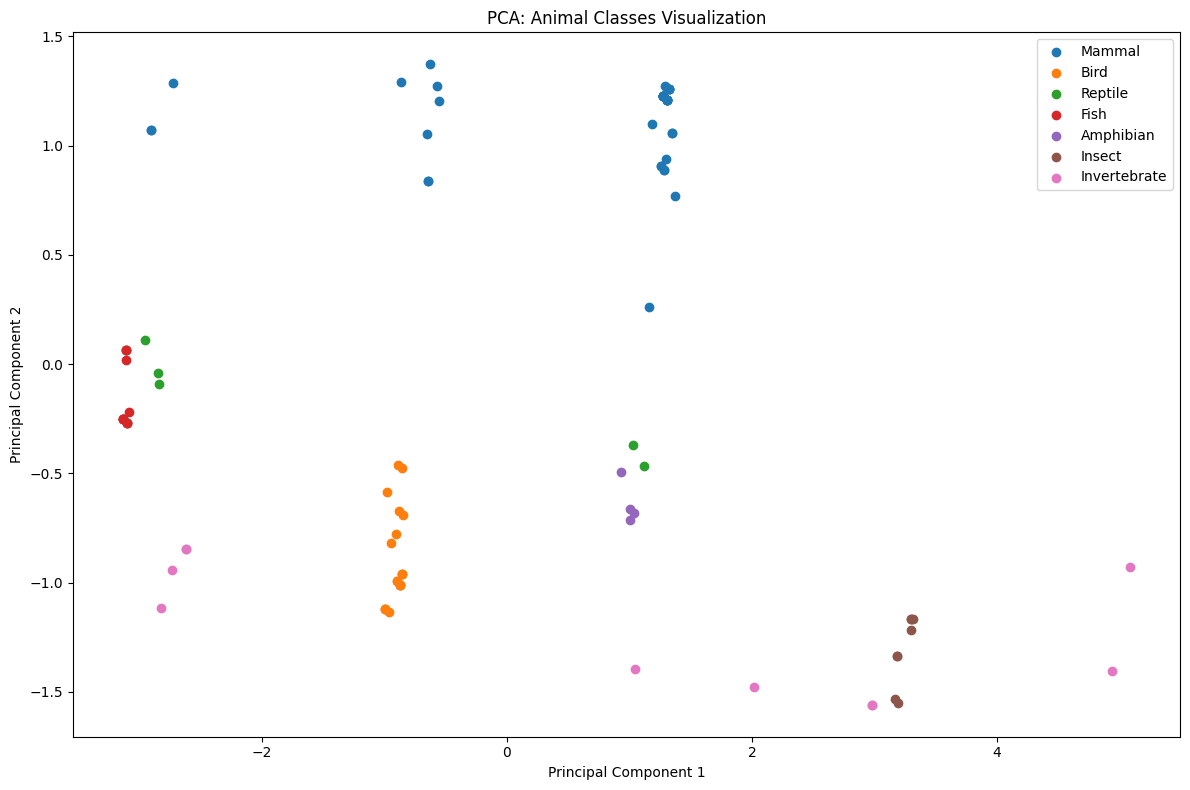

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load and preprocess the data
# Load the dataset
data = pd.read_csv('/content/zoo-data.csv')

# Quick examination of the data
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Get basic statistics
print("\nBasic statistics:")
print(data.describe())

# Class distribution
print("\nClass distribution:")
print(data['class_type'].value_counts())

# Mapping class_type to meaningful labels (optional)
class_names = {
    1: 'Mammal',
    2: 'Bird',
    3: 'Reptile',
    4: 'Fish',
    5: 'Amphibian',
    6: 'Insect',
    7: 'Invertebrate'
}

# Separate features and target
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the distribution of classes in train and test sets
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())

# 3. Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build and train the logistic regression model
# Using multinomial logistic regression since we have multiple classes
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = model.predict(X_test_scaled)

# 6. Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_names[i] for i in sorted(class_names.keys())],
            yticklabels=[class_names[i] for i in sorted(class_names.keys())])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# 8. Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(model.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# 9. Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression Model')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 10. Visualize the data (optional)
# PCA to visualize high-dimensional data in 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
for i in np.unique(y):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=class_names[i])

plt.title('PCA: Animal Classes Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()